In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ConsPensionContribModel import PensionContribConsumerType, init_pension_contrib

figures_path = "../../content/figures/"

c:\Users\alujan\mambaforge\envs\egmn-dev\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
baseline_params = init_pension_contrib.copy()
baseline_params["mCount"] = 100
baseline_params["mMax"] = 10
baseline_params["mNestFac"] = -1

baseline_params["nCount"] = 100

baseline_params["nMax"] = 12
baseline_params["nNestFac"] = -1

baseline_params["lCount"] = 100
baseline_params["lMax"] = 9
baseline_params["lNestFac"] = -1

baseline_params["b2Count"] = 100
baseline_params["b2Max"] = 13
baseline_params["b2NestFac"] = -1

baseline_params["aCount"] = 100
baseline_params["aMax"] = 8
baseline_params["aNestFac"] = -1

baseline_params["bCount"] = 100
baseline_params["bMax"] = 14
baseline_params["bNestFac"] = -1

baseline_params["cycles"] = 1

In [3]:
agent = PensionContribConsumerType(**baseline_params)

In [4]:
def plot_3d_func(func, min, max, n=100):
    # get_ipython().run_line_magic("matplotlib", "widget")
    xgrid = np.linspace(min, max, n)
    ygrid = xgrid

    xMat, yMat = np.meshgrid(xgrid, ygrid, indexing="ij")

    zMat = func(xMat, yMat)

    ax = plt.axes(projection="3d")
    ax.plot_surface(xMat, yMat, zMat, cmap="viridis")
    ax.set_title("surface")
    ax.set_xlabel("m")
    ax.set_ylabel("n")
    ax.set_zlabel("f")
    plt.show()

In [5]:
agent.solve()

T = 0

## Post Decision Stage


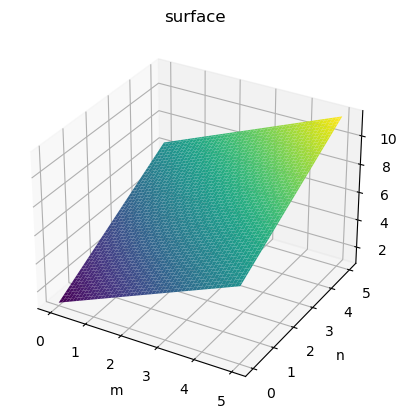

In [6]:
plot_3d_func(agent.solution[T].post_decision_stage.v_func.vFuncNvrs, 0, 5)

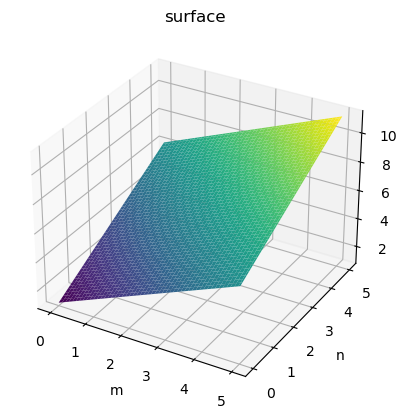

In [7]:
plot_3d_func(agent.solution[T].post_decision_stage.dvda_func.cFunc, 0, 5)

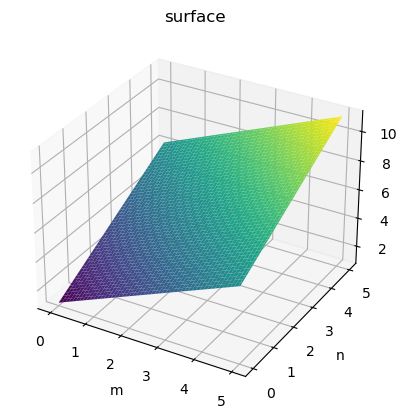

In [8]:
plot_3d_func(agent.solution[T].post_decision_stage.dvdb_func.cFunc, 0, 5)

## Consumption Stage


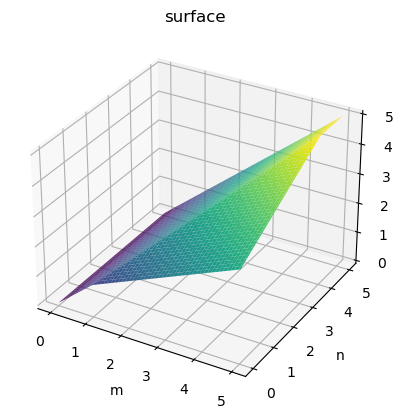

In [9]:
plot_3d_func(agent.solution[T].consumption_stage.c_func, 0, 5)

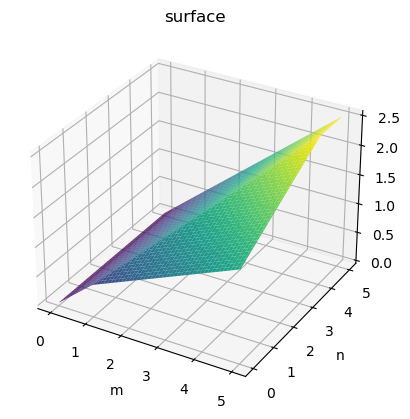

In [10]:
plot_3d_func(agent.solution[T].consumption_stage.v_func.vFuncNvrs, 0, 5)

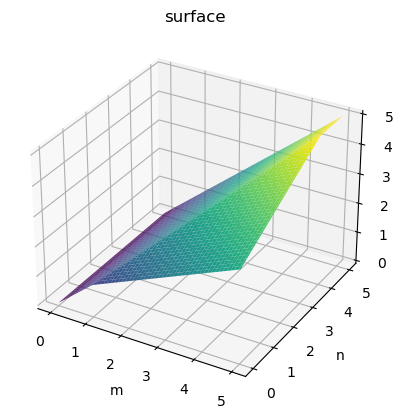

In [11]:
plot_3d_func(agent.solution[T].consumption_stage.dvdl_func.cFunc, 0, 5)

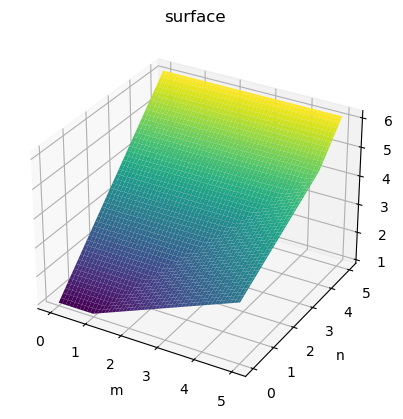

In [12]:
plot_3d_func(agent.solution[T].consumption_stage.dvdb_func.cFunc, 0, 5)

## Deposit Stage


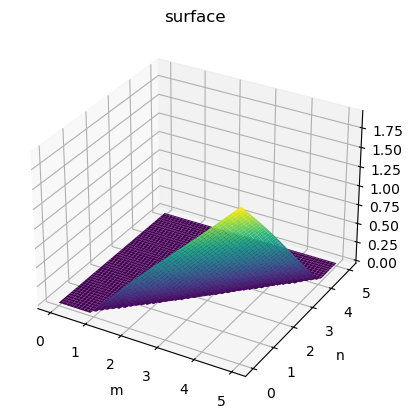

In [13]:
plot_3d_func(agent.solution[T].deposit_stage.d_func, 0, 5)

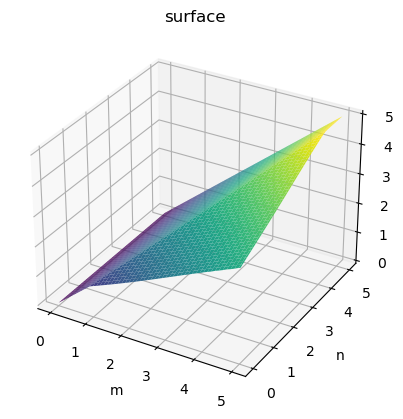

In [14]:
plot_3d_func(agent.solution[T].deposit_stage.c_func, 0, 5)

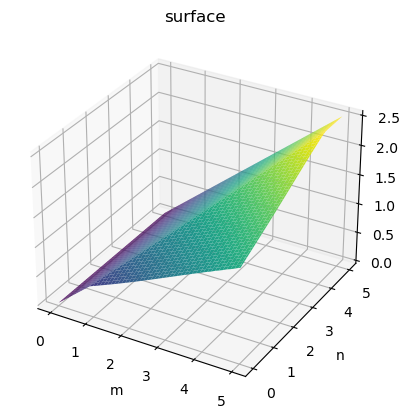

In [15]:
plot_3d_func(agent.solution[T].deposit_stage.v_func.vFuncNvrs, 0, 5)

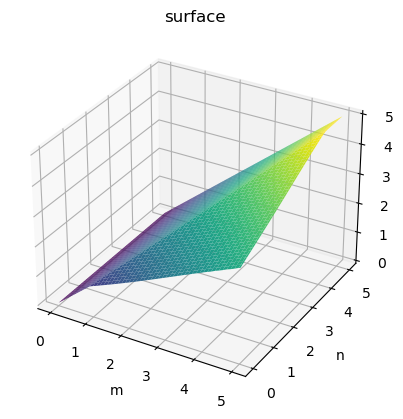

In [16]:
plot_3d_func(agent.solution[T].deposit_stage.dvdm_func.cFunc, 0, 5)

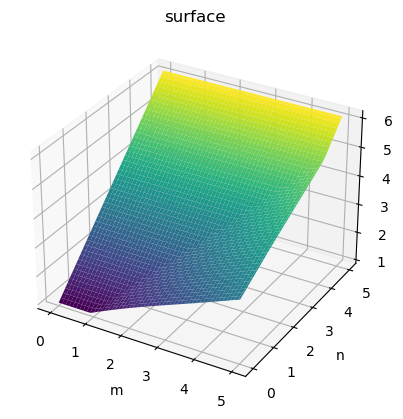

In [17]:
plot_3d_func(agent.solution[T].deposit_stage.dvdn_func.cFunc, 0, 5)

CPU times: total: 0 ns
Wall time: 0 ns


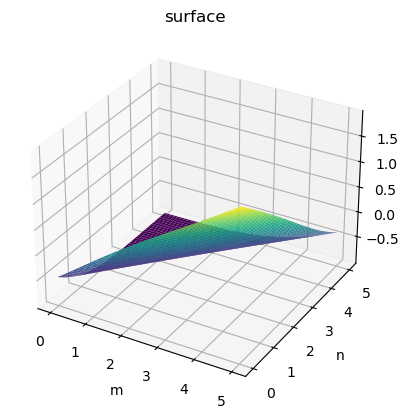

In [18]:
%time
plot_3d_func(agent.solution[T].deposit_stage.gaussian_interp, 0, 5)

## Grids


In [19]:
grids = agent.solution[T].consumption_stage.grids_before_cleanup

In [20]:
def scatter_hist(x, y, color, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    hist = ax.scatter(x, y, c=color, cmap="viridis", alpha=0.6, s=5)

    # now determine nice limits by hand:
    binwidth = 1
    xymax = max(np.max(x), np.max(y))
    xymin = min(np.min(x), np.min(y))
    top = (int(xymax / binwidth) + 1) * binwidth
    bottom = (int(xymin / binwidth) + 1) * binwidth

    bins = np.arange(bottom, top + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation="horizontal")

    return hist

In [21]:
def plot_scatter_hist(x, y, color, title, xlabel, ylabel, filename):
    # Create a Figure, which doesn't have to be square.
    fig = plt.figure(figsize=(6, 6), constrained_layout=True)
    # Create the main axes, leaving 25% of the figure space at the top and on the
    # right to position marginals.
    ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
    # The main axes' aspect can be fixed.
    ax.set(aspect=1)
    # Create marginal axes, which have 25% of the size of the main axes.  Note that
    # the inset axes are positioned *outside* (on the right and the top) of the
    # main axes, by specifying axes coordinates greater than 1.  Axes coordinates
    # less than 0 would likewise specify positions on the left and the bottom of
    # the main axes.
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)

    # remove non-finite values
    idx = np.logical_and.reduce([np.isfinite(x), np.isfinite(y), np.isfinite(color)])
    idx = np.logical_and.reduce([idx, x > 0, y > 0])

    x = x[idx]
    y = y[idx]
    color = color[idx]

    # Draw the scatter plot and marginals.
    hist = scatter_hist(x, y, color, ax, ax_histx, ax_histy)
    cbar = fig.colorbar(hist)
    cbar.ax.set_ylabel("Pension Deposits $d$")

    fig.suptitle(title, fontsize=14)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.show()
    fig.savefig(figures_path + filename)

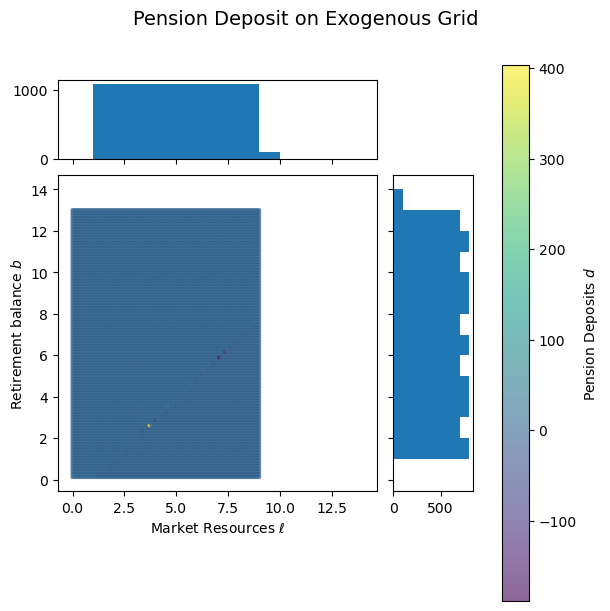

In [22]:
plot_scatter_hist(
    grids["lMat"],
    grids["b2Mat"],
    grids["dMat"],
    "Pension Deposit on Exogenous Grid",
    r"Market Resources $\ell$",
    "Retirement balance $b$",
    "ExogenousGrid.svg",
)

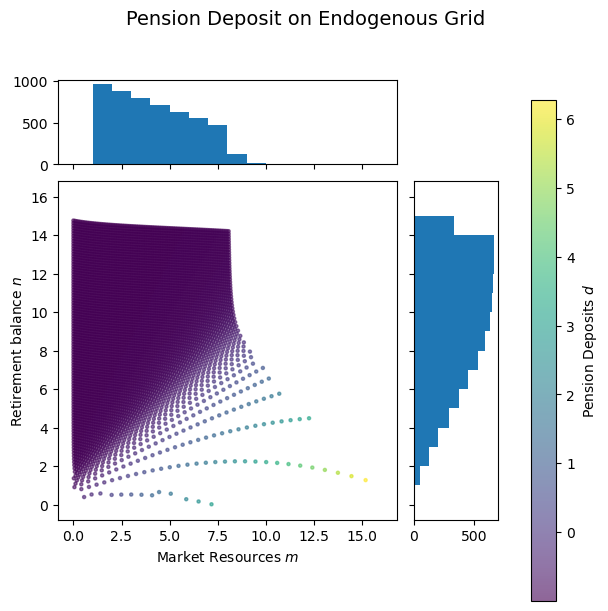

In [23]:
plot_scatter_hist(
    grids["mMat"],
    grids["nMat"],
    grids["dMat"],
    "Pension Deposit on Endogenous Grid",
    "Market Resources $m$",
    "Retirement balance $n$",
    "EndogenousGrid.svg",
)

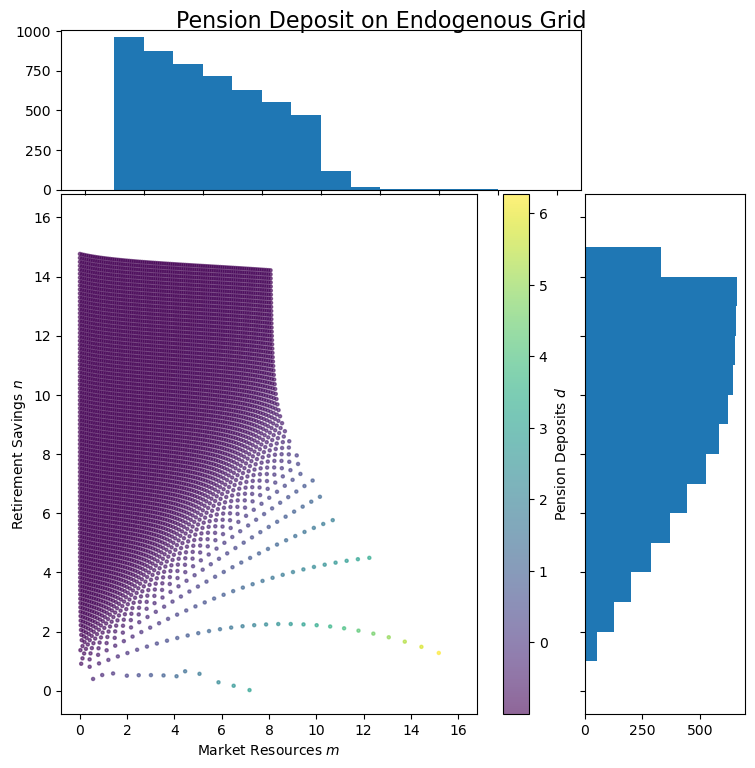

In [24]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

x = agent.solution[T].deposit_stage.gaussian_interp.grids[0]
y = agent.solution[T].deposit_stage.gaussian_interp.grids[1]
color = agent.solution[T].deposit_stage.gaussian_interp.values

idx = np.logical_or(x < 0, y < 0)

x = x[~idx]
y = y[~idx]
color = color[~idx]

# use the previously defined function
hist = scatter_hist(x, y, color, ax, ax_histx, ax_histy)
cbar = fig.colorbar(hist)
cbar.ax.set_ylabel("Pension Deposits $d$")

fig.suptitle("Pension Deposit on Endogenous Grid", fontsize=16)
ax.set_xlabel("Market Resources $m$")
ax.set_ylabel("Retirement Savings $n$")
plt.show()
# fig.savefig(figures_path + "EndogenousGrid.svg")

(-1.0, 10.0)

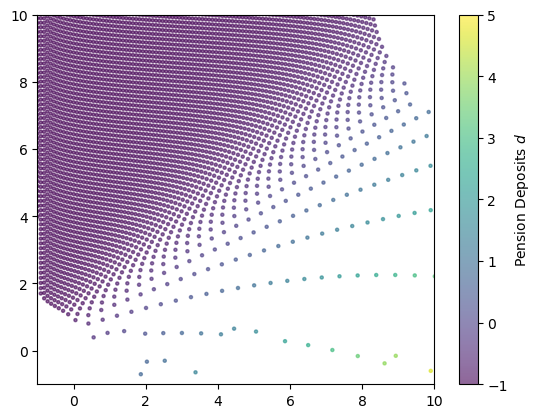

In [25]:
fig, ax = plt.subplots()
plot = ax.scatter(
    grids["mMat"],
    grids["nMat"],
    c=grids["dMat"],
    cmap="viridis",
    vmin=-1,
    vmax=5,
    plotnonfinite=True,
    alpha=0.6,
    s=5,
)
cbar = fig.colorbar(plot)
cbar.ax.set_ylabel("Pension Deposits $d$")

plt.xlim([-1, 10])
plt.ylim([-1, 10])

C:\Users\alujan\AppData\Local\Temp\ipykernel_39532\382406813.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  scatter = ax.scatter(


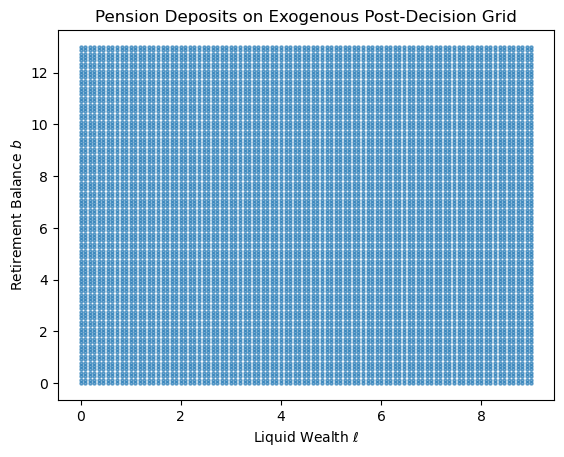

In [26]:
fig, ax = plt.subplots()
scatter = ax.scatter(
    grids["lMat"],
    grids["b2Mat"],
    # c=np.maximum(grids["dMat"], 0),
    # cmap="viridis",
    vmin=-2,
    vmax=15,
    plotnonfinite=True,
    alpha=0.6,
    s=5,
)
# cbar = fig.colorbar(scatter)
# cbar.ax.set_ylabel("Pension Deposits $d$")

plt.title("Pension Deposits on Exogenous Post-Decision Grid")
plt.xlabel(r"Liquid Wealth $\ell$")
plt.ylabel("Retirement Balance $b$")
fig.savefig(figures_path + "ExogenousGrid.svg")

In [27]:
grids = agent.solution[T].consumption_stage.grids_before_cleanup

In [28]:
from HARK.interpolation._sklearn import GeneralizedRegressionUnstructuredInterp

In [29]:
gauss_interp = GeneralizedRegressionUnstructuredInterp(
    grids["dMat"],
    [grids["mMat"], grids["nMat"]],
    model="gaussian-process",
    std=True,
    model_kwargs={"normalize_y": True},
)

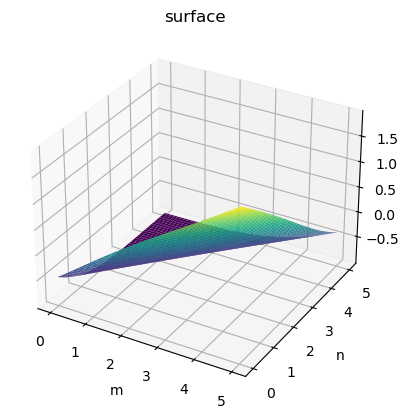

In [30]:
# get_ipython().run_line_magic("matplotlib", "widget")
plot_3d_func(gauss_interp, 0, 5)

In [31]:
# consumption_stage = agent.solution[T].consumption_stage
# dvdl_func_next = consumption_stage.dvdl_func
# dvdb_func_next = consumption_stage.dvdb_func
# c_func_next = consumption_stage.c_func
# v_func_next = consumption_stage.v_func

# dvdl_innr = dvdl_func_next(agent.lMat, agent.b2Mat)
# dvdb_innr = dvdb_func_next(agent.lMat, agent.b2Mat)


# def gp_inv(x):
#     return agent.TaxDeduct / x - 1


# # endogenous grid method, again
# dMat = gp_inv(dvdl_innr / dvdb_innr - 1.0)

In [32]:
# dvdl_func_next(0.0, 0.0)

In [33]:
# def adaptive_func(lb):
#     l, b = lb

#     dvdl_innr = dvdl_func_next(float(l), float(b))
#     dvdb_innr = dvdb_func_next(float(l), float(b))

#     return dvdl_innr / dvdb_innr


# import warnings

In [34]:
# from adaptive import Learner2D, Runner, notebook_extension

# warnings.filterwarnings("ignore")

# import logging

# from adaptive.learner.Learner2D import minimize_triangle_surface_loss

# logging.getLogger("param.main").setLevel(logging.CRITICAL)

# # import distributed

# # client = distributed.Client()


# notebook_extension()

# loss = minimize_triangle_surface_loss

# learner = Learner2D(adaptive_func, bounds=[(0, 10), (0, 10)], loss_per_triangle=loss)


# runner = Runner(learner, loss_goal=0.001)  # start calculation on all CPU cores
# runner.live_info()  # shows a widget with status information
# runner.live_plot(update_interval=0.1)

In [35]:
# def plot(learner):
#     plot = learner.plot(tri_alpha=0.2)
#     return (plot.Image + plot.EdgePaths.I + plot).cols(2)


# runner.live_plot(plotter=plot, update_interval=0.1)